# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)



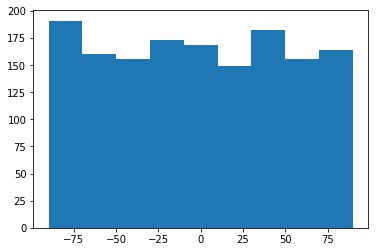

In [3]:
#Histogram to check equal distribution of latitudes
plt.hist(lats, bins=[-90,-70,-50,-30,-10,10,30,50,70,90])
plt.show()

In [4]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

586

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
#Split city list into groups of 60 (API limit 60 requests/min)
#Make timer so that api calls are delayed by one minute between groups

In [15]:
#city API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?q="

#set city number/index for data frame and tracking
city_num = 0

#empty city dataframe
cities_df=pd.DataFrame(columns=["City","Date","Cloudiness","Temperature","Humidity","Wind speed","Latitude","Longitude"])
cities_df.head()

,City,Date,Cloudiness,Temperature,Humidity,Wind speed,Latitude,Longitude


In [16]:
#loop through city list
for city in cities:
    #make url with city name
    query_url = f"{base_url}{city}&APPID={api_key}&units=imperial"
    #make api request
    res = requests.get(query_url)
    #convert to json
    res = res.json()
    try:
        #add info to dataframe
        #data to gather:city name, date, cloudiness, temp, humidity, wind speed, lat, lng
        cities_df.loc[city_num,"City"] = res["name"]
        cities_df.loc[city_num,"Date"] = res['dt']
        cities_df.loc[city_num,"Cloudiness"] = res['clouds']['all']
        cities_df.loc[city_num,"Temperature"] = res["main"]["temp_max"]
        cities_df.loc[city_num,"Humidity"] = res["main"]["humidity"]
        cities_df.loc[city_num,"Wind speed"] = res['wind']['speed']
        cities_df.loc[city_num,"Latitude"] = res['coord']['lat']
        cities_df.loc[city_num,"Longitude"] = res['coord']['lon']
        print(f"Processing request {city_num} {city}")
        
        #add to city count/index
        city_num = city_num +1
            
        #check for time delay using remainder, delay on 60 sec intervals
        if np.mod(city_num,60) == 0:
            time.sleep(60)
            
    #if city not found
    except KeyError:
        print(f"Error {city} not found")
            




Processing request 0 puerto suarez
Processing request 1 rikitea
Processing request 2 tiksi
Processing request 3 ternate
Processing request 4 hobart
Processing request 5 omboue
Processing request 6 vaini
Processing request 7 longyearbyen
Processing request 8 narsaq
Processing request 9 butaritari
Processing request 10 marawi
Error taolanaro not found
Processing request 11 tuktoyaktuk
Processing request 12 nanortalik
Processing request 13 lakki marwat
Processing request 14 nemuro
Error bossembele not found
Processing request 15 qaqortoq
Processing request 16 siilinjarvi
Processing request 17 punta arenas
Processing request 18 lucapa
Processing request 19 torres
Processing request 20 ushuaia
Processing request 21 ponta do sol
Processing request 22 georgetown
Error inderborskiy not found
Error kusk not found
Processing request 23 cape town
Processing request 24 havoysund
Processing request 25 kodiak
Processing request 26 bluff
Processing request 27 noumea
Processing request 28 mataura
Proc

Processing request 233 mandalgovi
Processing request 234 buston
Processing request 235 suez
Processing request 236 lere
Processing request 237 riviere-au-renard
Processing request 238 fortuna
Processing request 239 aklavik
Processing request 240 port elizabeth
Processing request 241 bandarbeyla
Processing request 242 sao felix do xingu
Processing request 243 codrington
Processing request 244 ayan
Processing request 245 dawlatabad
Processing request 246 ornskoldsvik
Processing request 247 thunder bay
Processing request 248 lesnoy
Processing request 249 hatillo
Processing request 250 morant bay
Processing request 251 bambous virieux
Processing request 252 chokurdakh
Processing request 253 asyut
Processing request 254 poum
Processing request 255 dingle
Processing request 256 alice springs
Processing request 257 saldanha
Processing request 258 koygorodok
Processing request 259 pompeia
Processing request 260 arica
Processing request 261 takarazuka
Processing request 262 shimoda
Processing r

Processing request 456 klaksvik
Processing request 457 ulladulla
Processing request 458 sorland
Processing request 459 wiarton
Processing request 460 cascais
Processing request 461 avera
Error bac lieu not found
Processing request 462 sao filipe
Processing request 463 necochea
Processing request 464 xiaolingwei
Processing request 465 beira
Processing request 466 cockburn town
Processing request 467 saskylakh
Processing request 468 casper
Processing request 469 catalao
Processing request 470 gourcy
Processing request 471 batemans bay
Processing request 472 tomatlan
Processing request 473 meadow lake
Processing request 474 caruray
Processing request 475 candido de abreu
Processing request 476 north myrtle beach
Processing request 477 chicama
Processing request 478 attock
Processing request 479 pacific grove
Processing request 480 tigil
Processing request 481 jumla
Processing request 482 beloha
Processing request 483 lufilufi
Processing request 484 ozernovskiy
Processing request 485 rabo 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
#check cities list
cities_df.head()

,City,Date,Cloudiness,Temperature,Humidity,Wind speed,Latitude,Longitude
0,Puerto Suarez,1546891200,75,91.45,70,9.42,-18.96,-57.8
1,Rikitea,1546895160,80,80.07,96,15.9,-23.12,-134.97
2,Tiksi,1546895160,12,-30.68,51,2.71,71.64,128.87
3,Ternate,1546891200,20,77,78,17.25,14.29,120.72
4,Hobart,1546893000,20,60.8,67,8.05,-42.88,147.33


In [18]:
#Make output data file
cities_df.to_csv(output_data_file, encoding = "utf-8")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

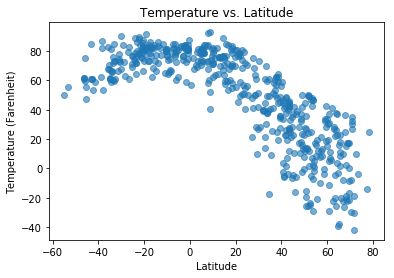

In [10]:
#data frame cities_df
cities_df = pd.read_csv(output_data_file)
plt.scatter(cities_df["Latitude"], cities_df["Temperature"], alpha=.6)
plt.title("Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (Farenheit)")
plt.show()

In [ ]:
#save figure
#plt.savefig("Latitude_vs_Temp.png")

#### Latitude vs. Humidity Plot

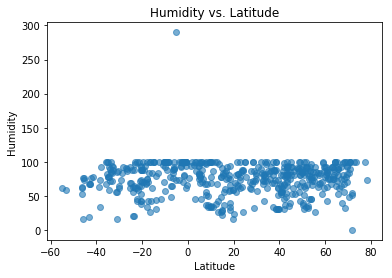

In [14]:
#data frame cities_df
cities_df = pd.read_csv(output_data_file)
plt.scatter(cities_df["Latitude"], cities_df["Humidity"], alpha=.6)
plt.title("Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

#### Latitude vs. Cloudiness Plot

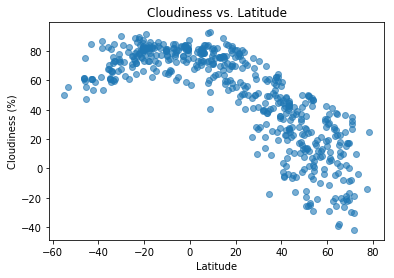

In [16]:
#data frame cities_df
cities_df = pd.read_csv(output_data_file)
plt.scatter(cities_df["Latitude"], cities_df["Temperature"], alpha=.6)
plt.title("Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

#### Latitude vs. Wind Speed Plot

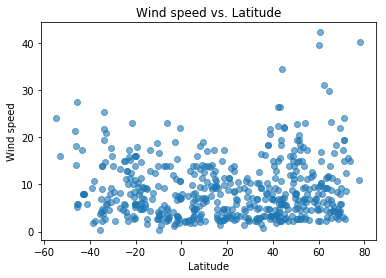

In [17]:
#data frame cities_df
cities_df = pd.read_csv(output_data_file)
plt.scatter(cities_df["Latitude"], cities_df["Wind speed"], alpha=.6)
plt.title("Wind speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind speed")
plt.show()